# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt
pf

<module 'pyfeng' from 'F:\\anaconda3\\lib\\site-packages\\pyfeng\\__init__.py'>

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([0.20400581, 0.20266888, 0.20161986, 0.20085527, 0.2003692 ,
        0.20015312, 0.20019595, 0.20048427, 0.20100266, 0.20173418,
        0.20266088, 0.20376432, 0.20502604, 0.20642803, 0.20795302,
        0.20958477, 0.2113082 , 0.21310949, 0.21497615, 0.21689693,
        0.2188618 , 0.22086191, 0.22288945, 0.22493758, 0.22700034]))

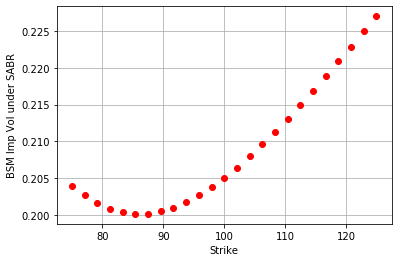

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

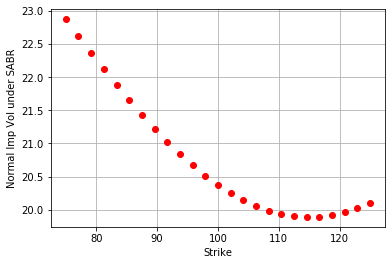

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.60780137,  8.16505218,  4.76869334]),
 array([0.20057006, 0.20502604, 0.21274362]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.20611324295816041, 'vov': 0.0, 'rho': 1.0}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

TypeError: _m_base() missing 1 required positional argument: 'vol'

## 2. Pricing under MC method

In [112]:
strike = np.linspace(75,125,num=25)
forward = 100

In [113]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [114]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.63313128, 23.75425687, 21.92872432, 20.16797877, 18.47495945,
        16.85899812, 15.32603946, 13.89071322, 12.54758429, 11.29695345,
        10.14576045,  9.09267326,  8.13086082,  7.2607347 ,  6.47705012,
         5.77181028,  5.1404805 ,  4.57815198,  4.07706386,  3.6330443 ,
         3.24230379,  2.89946509,  2.59477132,  2.32461835,  2.08368356]))

Repeat the same for beta = 0

In [115]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [116]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.60605788, 24.76537845, 22.95961144, 21.19501205, 19.48073146,
        17.81507209, 16.20934817, 14.6647415 , 13.19160199, 11.79581577,
        10.47900297,  9.24488353,  8.09683908,  7.03948196,  6.07328879,
         5.20298272,  4.42687339,  3.74245062,  3.14948835,  2.63160108,
         2.18587421,  1.80865517,  1.48919816,  1.2214988 ,  1.00095337]))

## 3. Pricing under conditional MC method

In [102]:
strike = np.linspace(75,125,num=25)
forward = 100

In [103]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [104]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 [25.536392426904484,
  23.655541052323727,
  21.82458042913153,
  20.051801958812174,
  18.345606897893727,
  16.71413883428803,
  15.164884355545396,
  13.704281271917067,
  12.33737723679925,
  11.06757736869525,
  9.896507796465132,
  8.8240053847776,
  7.848226163909845,
  6.965850197448394,
  6.172351556094377,
  5.462299589553122,
  4.829660874978676,
  4.268078063168655,
  3.771110111979522,
  3.3324262783769503,
  2.9459526297809755,
  2.6059743105652333,
  2.307199435085025,
  2.0447916183892634,
  1.8143782300494324])

Repeat the same for beta = 0

In [105]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [106]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 [26.578867852139986,
  24.74024810927343,
  22.938508203582952,
  21.178501498641072,
  19.46545591434079,
  17.804916872443094,
  16.202660155550458,
  14.664571421937593,
  13.19649130316117,
  11.80402820804241,
  10.492345053253535,
  9.265930780694413,
  8.128372074705345,
  7.08214429175384,
  6.128442289656932,
  5.267070740127012,
  4.496409178577278,
  3.813459702915898,
  3.213975872931225,
  2.6926616309425833,
  2.243420871667253,
  1.8596332605541057,
  1.5344308877402142,
  1.260953201559639,
  1.0325633688493014])

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [120]:
var_mc_bs = sabr_bsm_mc.sim_var
var_cmc_bs = sabr_bsm_cmc.sim_var

var_mc_bs, var_cmc_bs

(array([451.82573974, 441.74464613, 429.98784151, 416.43089018,
        401.37383093, 384.88738954, 367.20512483, 348.30616498,
        328.76836629, 308.94483686, 288.99390345, 269.20582317,
        249.9208787 , 231.27871476, 213.45301949, 196.5984878 ,
        180.7785246 , 166.01868484, 152.34494224, 139.72460154,
        128.10473566, 117.43044447, 107.67051494,  98.76140741,
         90.64876532]),
 [10.074072508445115,
  10.646458057979931,
  11.255433633735997,
  11.882304698683093,
  12.50203217262961,
  13.084088743798212,
  13.59446261942735,
  13.998761170705013,
  14.266032688733798,
  14.372617560527793,
  14.305206238126344,
  14.062415508668419,
  13.6545701082491,
  13.10184611134511,
  12.431309324218699,
  11.673543481635626,
  10.859500505107478,
  10.017998734389607,
  9.174051300073199,
  8.348005592460362,
  7.555350622074531,
  6.806999512402166,
  6.109858356289818,
  5.46752593245573,
  4.881012035651758])

In [121]:
var_mc_n = sabr_norm_mc.sim_var
var_cmc_n = sabr_norm_cmc.sim_var

var_mc_n, var_cmc_n

(array([322.49386995, 310.03999143, 296.80668948, 282.74819185,
        267.75595132, 252.19633823, 235.96644158, 219.3570582 ,
        202.38553245, 185.2319609 , 168.1853631 , 151.46442178,
        135.27534133, 119.77821669, 105.16051098,  91.51688357,
         78.96152042,  67.56424223,  57.32262841,  48.2972787 ,
         40.43368108,  33.64062456,  27.84122251,  22.93683031,
         18.81123413]),
 [10.852307961794784,
  9.680563743144404,
  8.528433216332509,
  7.414452693442315,
  6.357873140694349,
  5.37757471085414,
  4.490737266888408,
  3.7113659374275527,
  3.0488354953936,
  2.5066737128997856,
  2.0818312711274207,
  1.7646622804929772,
  1.5397499031972866,
  1.3875583239044291,
  1.2867033145393798,
  1.216461744699717,
  1.1590490233280968,
  1.1012298891738788,
  1.0349953771850127,
  0.9572850626268473,
  0.8689699114576493,
  0.7734539449784313,
  0.6752656155464084,
  0.578914359053862,
  0.4881437616005891])